# Business Understanding

This dataset is associated with the direct marketing campaigns of a Portuguese banking institution. The campaigns aimed to promote term deposits, a financial product where customers invest a fixed sum for a set duration in exchange for interest. The goal of the campaigns was to convert as many customers as possible into term deposit subscribers.

Marketing campaigns, especially direct calls, are expensive and time-consuming. A well-optimized strategy can significantly reduce costs and improve customer acquisition rates by focusing on the most likely customers.


# Objective 




The objective of this project is to analyze and optimize the marketing campaigns of a Portuguese bank by leveraging historical customer data. The primary focus is to predict whether a customer will subscribe to a term deposit (y: "yes" or "no") based on demographic, financial, and behavioral features.

# Data Defination





#### Customer Demographics:
- age: Age of the customer (numeric).
- job: Profession of the customer (e.g., "management," "blue-collar").
- marital: Marital status (e.g., "single," "married").
- education: Education level (e.g., "secondary," "tertiary").
#### Financial Information:
- default: Whether the customer has credit in default ("yes" or "no").
- balance: Average annual balance in the customer’s bank account (in Euros).
- housing: Whether the customer has a housing loan ("yes" or "no").
- loan: Whether the customer has a personal loan ("yes" or "no").
#### Contact and Campaign Data:
- contact: Communication type (e.g., "cellular," "telephone").
- day: Day of the month when the last contact was made.
- month: Month of the last contact (e.g., "jan," "may").
- duration: Duration of the last call in seconds (numeric).
- Historical Campaign Performance:
- campaign: Number of contacts made in the current campaign.
- pdays: Days since last contact in a previous campaign (-1 if not contacted).
- previous: Number of contacts made before this campaign.
- poutcome: Outcome of the previous campaign (e.g., "success," "failure").
#### Target Variable:
- y: Whether the customer subscribed to a term deposit ("yes" or "no").

# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np # mathematical library
import pandas as pd # for handling data
/
# Data Visualisation
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns 

# Setting Visualization Styles # Supress Warn
%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_palette("Set2")
pd.set_option('display.max_columns', None)

# Reading Understanding Data And Data Cleaning

In [2]:
bank = pd.read_csv('bank-full.csv',sep=';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.shape

(45211, 17)

In [5]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank.duplicated().sum()

0

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- No missing Values 
- No data types error
- No duplicates
- need to convert pday to 0
- Duration is in seconds we should convert it in minutes

In [8]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


- The majority of customers are likely between 30 to 50 years old.
- A significant variation in account balances, with some customers having negative balances, indicating possible overdrafts or     debts.
- A few customers had very long calls, but most calls were much shorter. The variance suggests that longer calls might indicate   greater customer interest.
- Most customers were contacted 1-3 times, but some were contacted extensively, possibly due to unsuccessful attempts in           previous contacts.
- A large portion of customers has no previous contact (indicated by -1), and others have been contacted at varying intervals, suggesting inconsistent follow-up strategies.
- Most customers had little to no previous contact, indicating that the majority of efforts are focused on fresh leads or initial contact.


In [9]:
# Replacing -1 to zero in pday
bank['pdays'] = bank['pdays'].replace(-1, 0)


In [11]:
# Duration of call is in sec converting it into minutes
bank['duration'] = bank['duration']/60

In [12]:
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

####  creating age groups


- Young (18-30 years)
- Adult (31-45 years)
- Middle-Aged (46-60 years)
- Senior (60+ years)

In [13]:
bins = [18, 30, 45, 60, 100] 
labels = ['Young', 'Adult', 'Middle-Aged', 'Senior'] 
bank['age_group'] = pd.cut(bank['age'], bins=bins, labels=labels, right=False)

In [14]:
bank[['age', 'age_group']].head()

,age,age_group
0,58,Middle-Aged
1,44,Adult
2,33,Adult
3,47,Middle-Aged
4,33,Adult


In [15]:
bank.drop('age', axis = 1, inplace = True )

In [16]:
bank['age_group'] = bank['age_group'].astype('object')


# Post Profiling

In [17]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   job        45211 non-null  object 
 1   marital    45211 non-null  object 
 2   education  45211 non-null  object 
 3   default    45211 non-null  object 
 4   balance    45211 non-null  int64  
 5   housing    45211 non-null  object 
 6   loan       45211 non-null  object 
 7   contact    45211 non-null  object 
 8   day        45211 non-null  int64  
 9   month      45211 non-null  object 
 10  duration   45211 non-null  float64
 11  campaign   45211 non-null  int64  
 12  pdays      45211 non-null  int64  
 13  previous   45211 non-null  int64  
 14  poutcome   45211 non-null  object 
 15  y          45211 non-null  object 
 16  age_group  45211 non-null  object 
dtypes: float64(1), int64(5), object(11)
memory usage: 5.9+ MB


# Exploratory Data Analysis

### Distribution of Term Deposit Subscription

<Axes: xlabel='y', ylabel='count'>

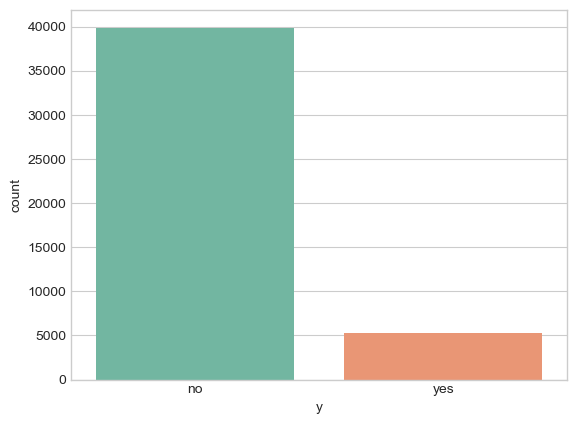

In [18]:
sns.countplot(x='y', data=bank )


- Very few people take Term deposite Subscription

<Axes: xlabel='education', ylabel='count'>

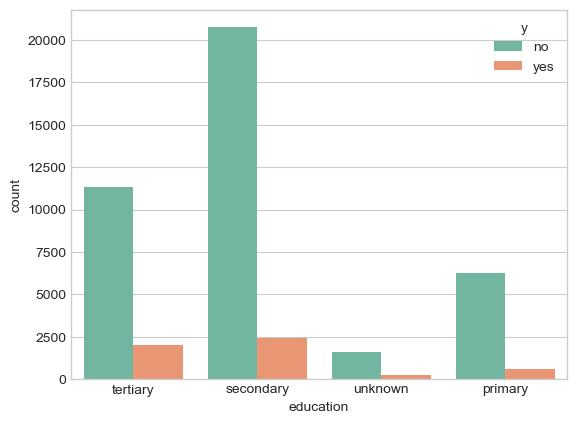

In [19]:
sns.countplot(x = 'education',hue='y', data = bank)

- People with Secondary education (7-12 standard) has higher subscription level

#### Job vs Term Deposit Subscription

<Axes: xlabel='job'>

<Figure size 1000x600 with 0 Axes>

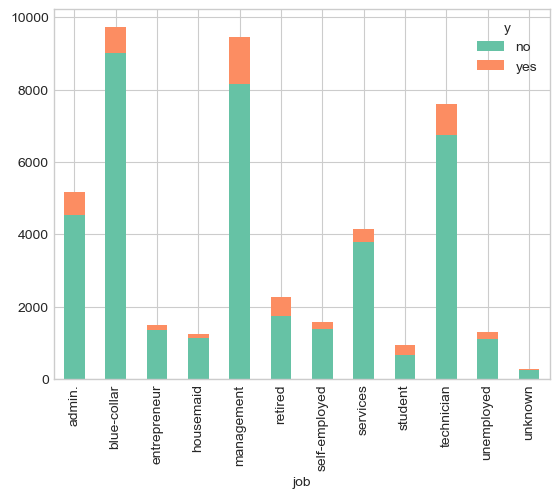

In [20]:
plt.figure(figsize=(10, 6))
pd.crosstab(bank['job'], bank['y']).plot(kind='bar', stacked=True)



- Person with Blue Collar job and Management opts for term Deposite subscription followed by technicians 

### Term Deposit Subscription by Age Group

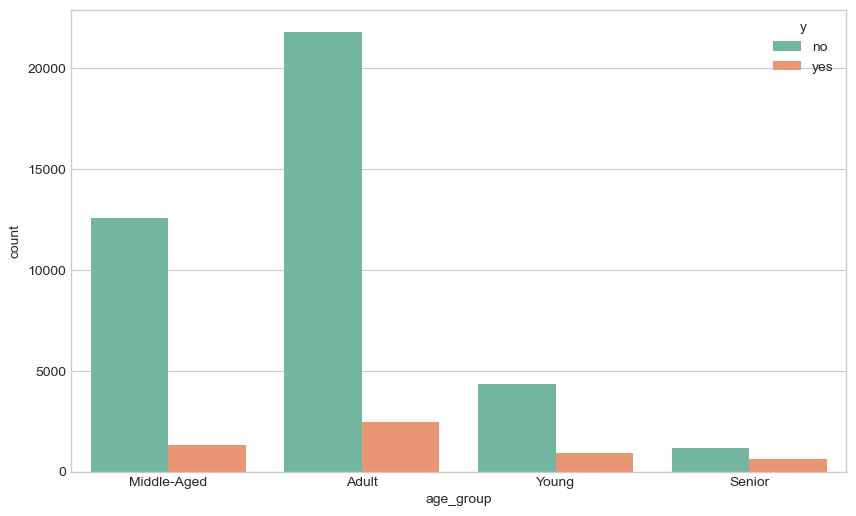

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='y', data=bank)
plt.show()

# X- Y Split

In [22]:
x = bank.drop(columns = ['y'])
y = bank['y']

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Catagorical Continious Split

In [26]:
x_train_cat = x_train.select_dtypes(include=['object'])
x_train_cont = x_train.select_dtypes(exclude=['object'])


In [27]:
x_test_cat = x_test.select_dtypes(include=['object'])
x_test_cont = x_test.select_dtypes(exclude=['object'])


# Encoding

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False , drop = 'first',handle_unknown='ignore')
encoder.fit(x_train_cat)

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [29]:
x_train_cat_encoded = pd.DataFrame(data = encoder.transform(x_train_cat),
                                   index = x_train_cat.index,
                                   columns = encoder.get_feature_names_out(x_train_cat.columns))

x_test_cat_encoded = pd.DataFrame(data = encoder.transform(x_test_cat),
                                    index = x_test_cat.index,
                                    columns = encoder.get_feature_names_out(x_test_cat.columns))

# Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(x_train_cont)

MinMaxScaler()

In [31]:
x_train_cont

,balance,day,duration,campaign,pdays,previous
3344,849,15,0.020000,1,0,0
17965,1415,30,0.074722,2,0,0
18299,3842,31,0.036111,4,0,0
10221,-119,11,0.104167,11,0,0
32192,3498,15,0.073333,2,0,0
...,...,...,...,...,...,...
11284,1059,18,0.581389,1,0,0
44732,508,8,0.058333,1,92,1
38158,1317,15,0.066389,1,0,0
860,165,7,0.030833,1,0,0


In [32]:
x_train_cont_scaled = pd.DataFrame(scaler.transform(x_train_cont),
            index = x_train_cont.index,
            columns = x_train_cont.columns )

x_test_cont_scaled = pd.DataFrame(scaler.transform(x_test_cont),
            index = x_test_cont.index,
            columns = x_test_cont.columns)

In [33]:
x_test_cont_scaled.shape

(9043, 6)

# Concat

In [61]:
x_train_comb = pd.concat([x_train_cat_encoded,x_train_cont_scaled], axis=1)
x_test_comb = pd.concat([x_test_cat_encoded,x_test_cont_scaled], axis=1)

In [62]:
x_train_comb.shape

(36168, 44)

# Dimensionality Reduction

In [63]:
from sklearn.decomposition import PCA
pca = PCA() 

pca.fit(x_train_comb)


PCA()

In [64]:
(pd.Series(np.cumsum(pca.explained_variance_ratio_), index = range(1,45)) <= 0.90).sum()

20

In [65]:
(pd.Series(np.cumsum(pca.explained_variance_ratio_)) <= 0.90).sum()

20

In [66]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.137466
1     0.256020
2     0.354130
3     0.422502
4     0.473859
5     0.523833
6     0.572309
7     0.613924
8     0.651310
9     0.685275
10    0.717165
11    0.743290
12    0.768554
13    0.791270
14    0.813382
15    0.831989
16    0.848103
17    0.862759
18    0.876800
19    0.889712
20    0.901349
21    0.912608
22    0.922341
23    0.931254
24    0.939401
25    0.946778
26    0.953764
27    0.959855
28    0.965409
29    0.970622
30    0.975553
31    0.980278
32    0.984688
33    0.988365
34    0.991288
35    0.993753
36    0.995409
37    0.996816
38    0.997815
39    0.998534
40    0.999219
41    0.999798
42    0.999986
43    1.000000
dtype: float64

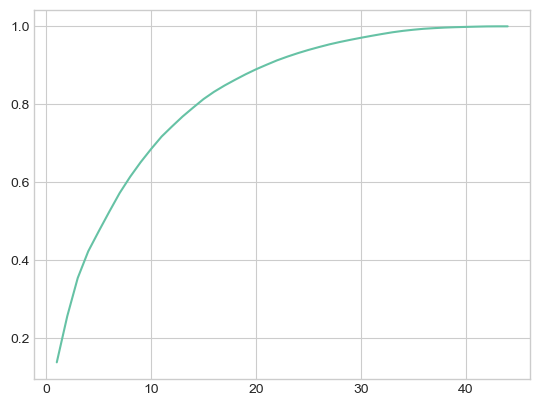

In [67]:
plt.plot(pd.Series(np.cumsum(pca.explained_variance_ratio_), index = range(1,45)))

In [68]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 20) 

# Fit PCA on the training data
pca1.fit(x_train_comb)



PCA(n_components=20)

In [69]:
cols = 'P' + pd.Series(range(1,21)).astype(str)

In [70]:
x_train_pca = pd.DataFrame(data = pca1.transform(x_train_comb),
            index = x_train_comb.index,
            columns = cols)

In [71]:
x_train_pca.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20
3344,-0.830099,0.141611,-1.105374,0.062273,0.471065,-0.089184,-0.430859,-0.459181,0.172568,0.075673,-0.087952,-0.063357,0.071216,-0.104017,0.017016,0.090471,-0.109005,-0.057546,0.032915,0.018629
17965,0.026917,0.721354,0.127107,-0.207411,-0.103229,0.466027,0.842730,-0.278432,0.817650,-0.015442,-0.765831,0.263767,-0.033464,0.008321,0.280791,-0.059029,-0.280295,-0.124334,0.154820,0.050215
18299,-0.083146,0.524545,0.812568,-0.034800,0.284932,0.667138,-0.145107,-0.087749,-0.409569,0.060998,-0.457010,0.372315,0.297653,-0.180173,0.181432,0.077094,0.135093,-0.177321,0.118044,-0.195545
10221,0.777338,-0.951595,-0.946903,0.718049,0.045014,0.190964,-0.062103,0.790392,0.273675,-0.572096,0.173890,0.144242,-0.046861,-0.271133,0.067292,-0.122113,-0.044673,0.129187,-0.077619,-0.061081
32192,0.090824,0.917188,0.104613,0.254907,0.687651,-0.654282,0.097432,-0.432181,0.172730,-0.005387,-0.064988,0.002846,0.032740,0.177533,-0.103555,0.245132,-0.093501,-0.006623,0.150156,0.091145


In [72]:
x_test_pca = pd.DataFrame(data = pca1.transform(x_test_comb),
            index = x_test_comb.index,
            columns = cols)

# Checking Assumptions

In [73]:
x_train_comb.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,age_group_Middle-Aged,age_group_Senior,age_group_Young,balance,day,duration,campaign,pdays,previous
3344,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.080511,0.466667,0.014640,0.000000,0.0,0.0
17965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.085650,0.966667,0.054697,0.016129,0.0,0.0
18299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.107684,1.000000,0.026434,0.048387,0.0,0.0
10221,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.071723,0.333333,0.076251,0.161290,0.0,0.0
32192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.104561,0.466667,0.053680,0.016129,0.0,0.0


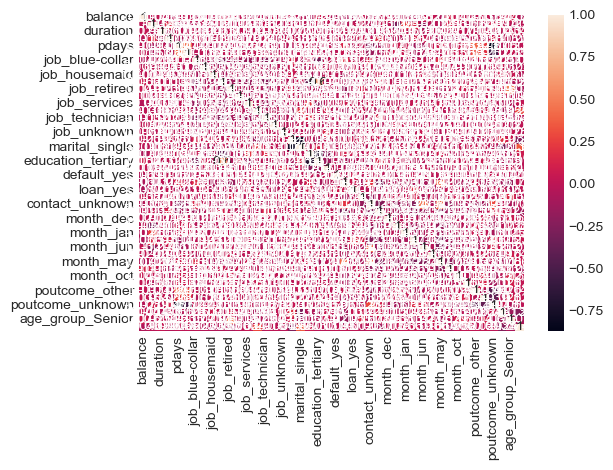

In [116]:

sns.heatmap(x_train_comb.corr(),annot = True)
plt.tight_layout()
plt.show()

# Model Building

In [74]:
train_features = x_train_comb.columns

In [75]:
x_test_comb = x_test_comb[train_features]

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000) 
model.fit(x_train_comb, y_train)

LogisticRegression(max_iter=1000)

In [77]:
y_pred = model.predict(x_test_comb)

## KNN Classifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_comb, y_train)


KNeighborsClassifier()

In [79]:
y_pred_KNN = knn_classifier.predict(x_test_comb)

In [80]:
y_pred_KNN

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

#### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_comb, y_train)


RandomForestClassifier(random_state=42)

In [82]:
y_pred_rf = rf_classifier.predict(x_test_comb)

In [83]:
y_pred_rf

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

#### SVC

In [84]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=1.0, gamma='scale')
svc.fit(x_train_comb, y_train)

SVC()

In [85]:
y_pred_svc = svc.predict(x_test_comb)

In [86]:
y_pred_svc

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

# Model Evaluation

In [87]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#### Logistic Regression

In [88]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8989273471193188
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7952
         yes       0.66      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043

[[7767  185]
 [ 729  362]]


#### KNN

In [89]:
accuracy = accuracy_score(y_test, y_pred_KNN)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred_KNN))
print(confusion_matrix(y_test, y_pred_KNN))

Accuracy: 0.8880902355413026
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7952
         yes       0.59      0.24      0.35      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043

[[7764  188]
 [ 824  267]]


#### Random Forest

In [90]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9033506579674887
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7952
         yes       0.66      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043

[[7730  222]
 [ 652  439]]


#### SVC

In [91]:
accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

Accuracy: 0.8925135463894726
              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7952
         yes       0.68      0.21      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043

[[7846  106]
 [ 866  225]]
